# Input Data


Downloading data from gdrive

In [ ]:
# Import PyDrive and associated libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
file_id = '1X4wzY14dO1q-usR9P3FJfWjkQjqgbbKw'
downloaded = drive.CreateFile({'id': file_id})

string_data=downloaded.GetContentString()

Cleaning training data
Removed Name, Ticket and Cabin

TODO - Global medians for miss, master, mister, misses
Use SibSp to get median of age of same surname travellers
Use Parch
pclass can be filled by taking median of same surname travellers


In [ ]:
import pandas as pd
import numpy as np
from io import StringIO

dataStream = StringIO(string_data)
data = pd.read_csv(dataStream)

data.set_index(inplace=True, keys=['PassengerId'], drop=True)
data.drop(axis=1, labels=['Name', 'Ticket', 'Cabin'], inplace=True)

#include cabin

print(data)

             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S
...               ...     ...     ...   ...    ...    ...      ...      ...
887                 0       2    male  27.0      0      0  13.0000        S
888                 1       1  female  19.0      0      0  30.0000        S
889                 0       3  female   NaN      1      2  23.4500        S
890                 1       1    male  26.0      0      0  30.0000        C
891                 0       3    male  32.0      0      0   7.7500        Q

[891 rows x

In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing Data

In [ ]:
# Checking for missing values

print(data.loc[data['Embarked'].isnull()].shape[0])
print(data.loc[data['Age'].isnull()].shape[0])
print(data.loc[data['Survived'].isnull()].shape[0])
print(data.loc[data['Pclass'].isnull()].shape[0])
print(data.loc[data['Sex'].isnull()].shape[0])
print(data.loc[data['SibSp'].isnull()].shape[0])
print(data.loc[data['Parch'].isnull()].shape[0])
print(data.loc[data['Fare'].isnull()].shape[0])

2
177
0
0
0
0
0
0


In [ ]:
ageMedian = data['Age'].median()

data['Embarked'] = data['Embarked'].fillna(method='pad')
data['Age'] = data['Age'].fillna(ageMedian)

Data Transformation

Using Dummy Encoding for Sex and Embarked.
Using Ordinal Values for pClass

In [ ]:
sexTransformDict = {
    "male":0,
    "female":1
}

pclassTransformDict = {
    1:0,
    2:1,
    3:2
}

cleaned_data = data.copy(deep=True)

cleaned_data = pd.get_dummies(cleaned_data, columns=['Embarked'], prefix=['Embarked'], drop_first=True)
cleaned_data['Sex'] = cleaned_data['Sex'].apply(lambda x:sexTransformDict[x])
cleaned_data['Pclass'] = cleaned_data['Pclass'].apply(lambda x:pclassTransformDict[x])

print(cleaned_data)

             Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  \
PassengerId                                                                   
1                   0       2    0  22.0      1      0   7.2500           0   
2                   1       0    1  38.0      1      0  71.2833           0   
3                   1       2    1  26.0      0      0   7.9250           0   
4                   1       0    1  35.0      1      0  53.1000           0   
5                   0       2    0  35.0      0      0   8.0500           0   
...               ...     ...  ...   ...    ...    ...      ...         ...   
887                 0       1    0  27.0      0      0  13.0000           0   
888                 1       0    1  19.0      0      0  30.0000           0   
889                 0       2    1  28.0      1      2  23.4500           0   
890                 1       0    0  26.0      0      0  30.0000           0   
891                 0       2    0  32.0      0     

Data Description

In [ ]:
cleaned_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,1.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.087542,0.722783
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.282787,0.447876
min,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,2.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,2.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee5846a910>,
      dtype=object)

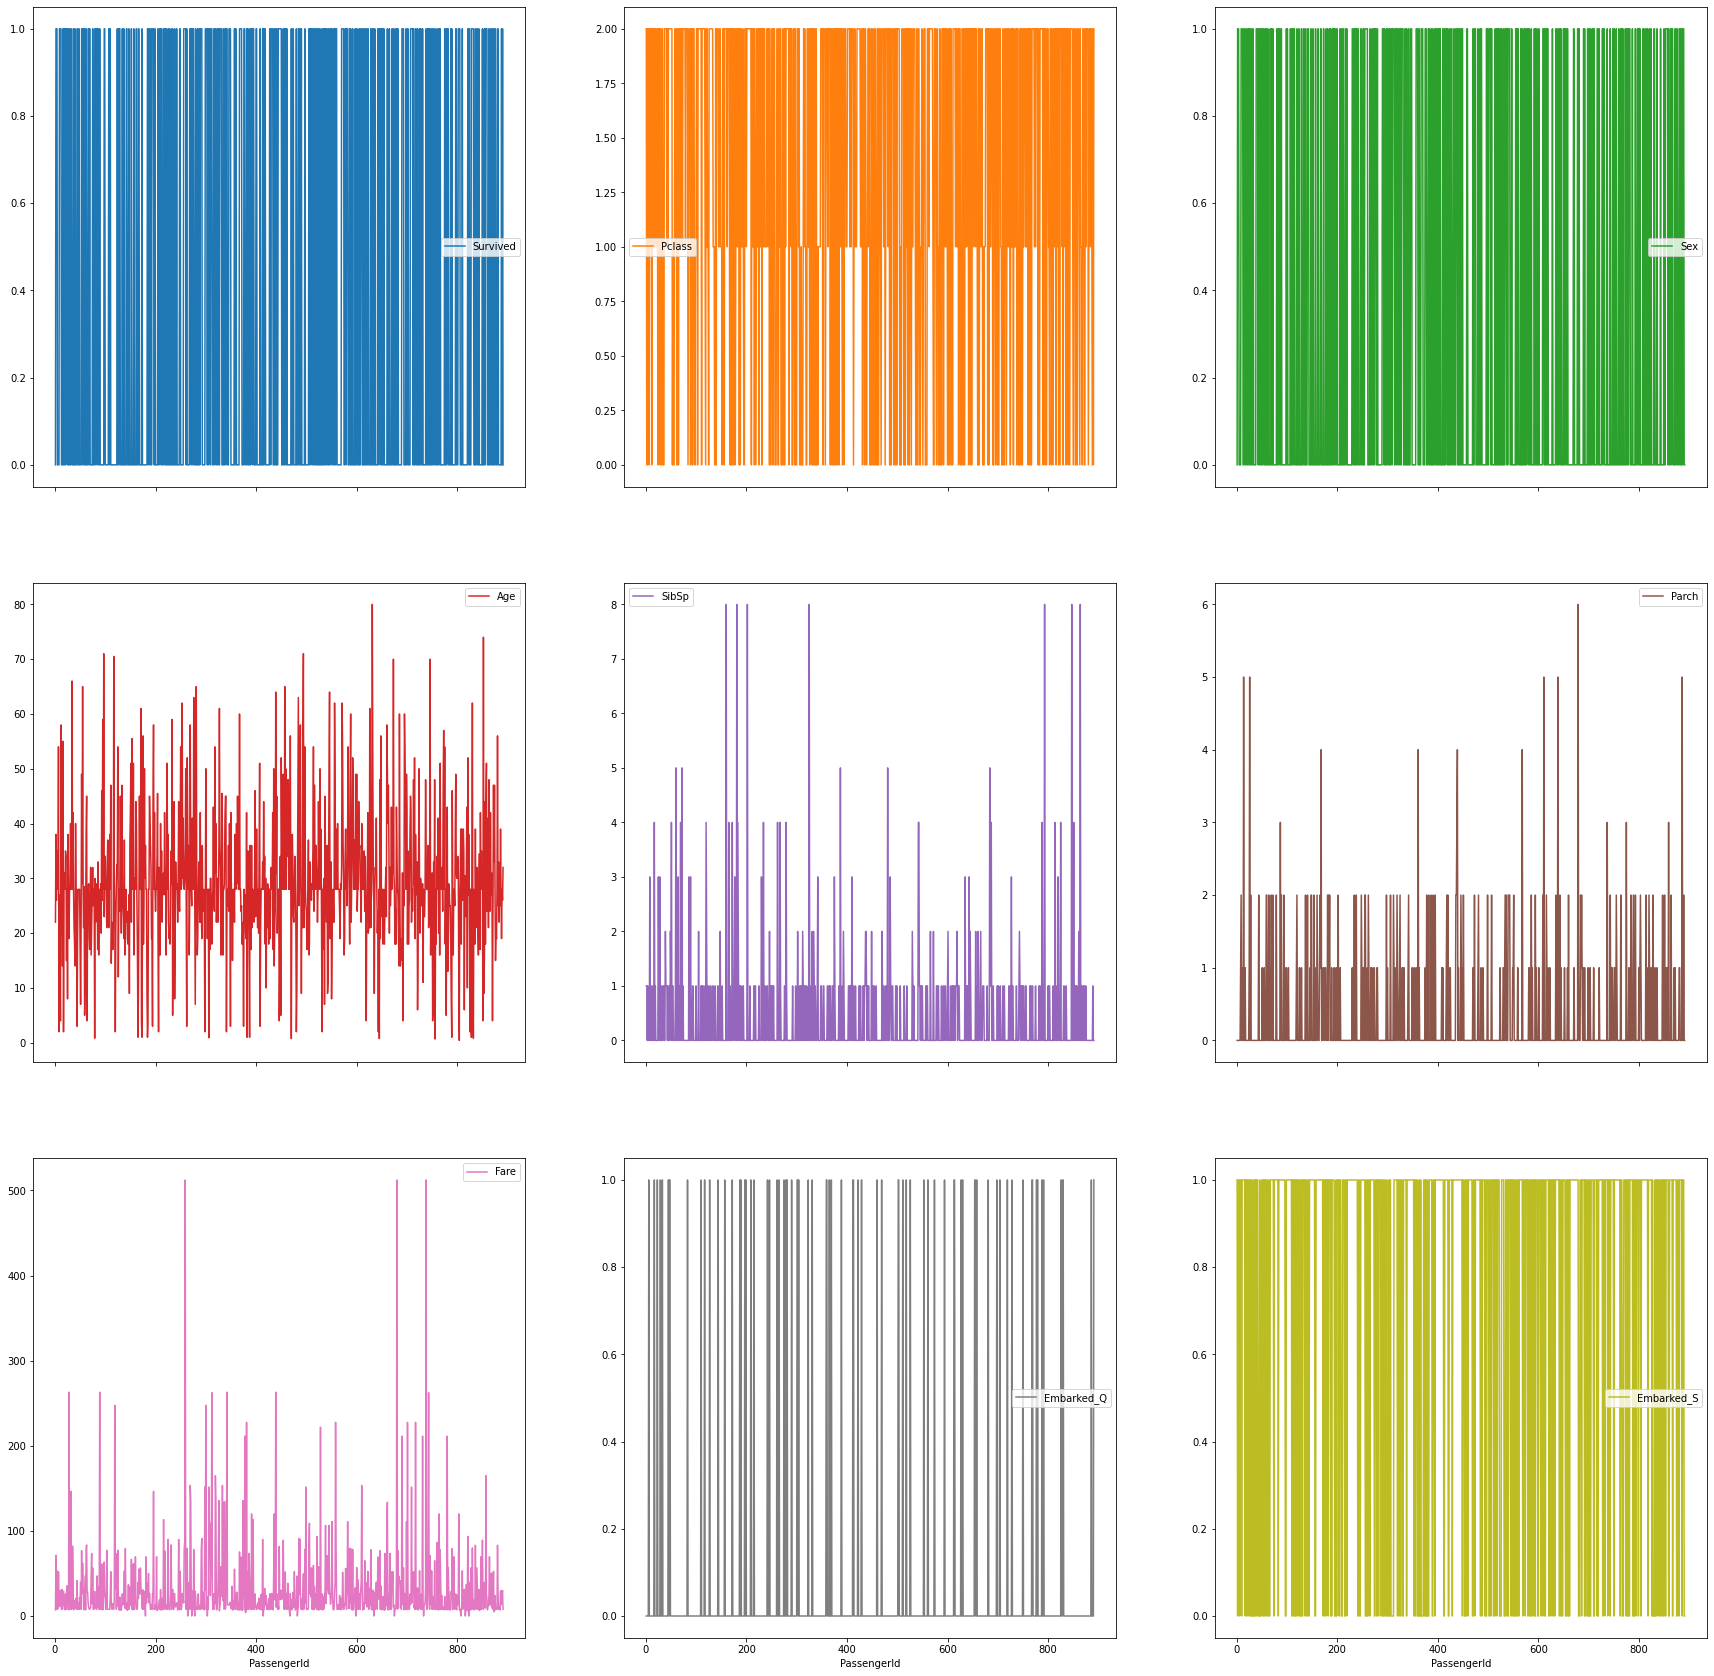

In [ ]:
cleaned_data.plot(subplots=True, layout=(3,3), use_index=True, figsize=(30, 30), fontsize=10, sort_columns=True)

In [ ]:
cleaned_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,2,0,22.0,1,0,7.2500,0,1
2,1,0,1,38.0,1,0,71.2833,0,0
3,1,2,1,26.0,0,0,7.9250,0,1
4,1,0,1,35.0,1,0,53.1000,0,1
5,0,2,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
887,0,1,0,27.0,0,0,13.0000,0,1
888,1,0,1,19.0,0,0,30.0000,0,1
889,0,2,1,28.0,1,2,23.4500,0,1


Splitting the dataset

In [ ]:
cols = cleaned_data.columns

x = cleaned_data.drop('Survived', axis=1)
y = cleaned_data.drop(cols.drop('Survived'), axis=1)

testSize = 0.1

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testSize, random_state = 42)
print(x_train, x_test, y_train, y_test)

             Pclass  Sex   Age  SibSp  Parch      Fare  Embarked_Q  Embarked_S
PassengerId                                                                   
166               2    0   9.0      0      2   20.5250           0           1
542               2    1   9.0      4      2   31.2750           0           1
626               0    0  61.0      0      0   32.3208           0           1
389               2    0  28.0      0      0    7.7292           1           0
77                2    0  28.0      0      0    7.8958           0           1
...             ...  ...   ...    ...    ...       ...         ...         ...
107               2    1  21.0      0      0    7.6500           0           1
271               0    0  28.0      0      0   31.0000           0           1
861               2    0  41.0      2      0   14.1083           0           1
436               0    1  14.0      1      2  120.0000           0           1
103               0    0  21.0      0      1   77.28

# Common Utils

In [ ]:
from google.colab import drive as gdrive
gdrive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Loading competition test data

In [ ]:
#Read competition data
file_id = '1jlOGhdjBr9RIhlilNGIGxUjR8Ucg3hRQ'
downloaded = drive.CreateFile({'id': file_id})

data_competition=downloaded.GetContentString()

In [ ]:
data_stream_competition = StringIO(data_competition)
competition_data = pd.read_csv(data_stream_competition)

competition_data.set_index(inplace=True, keys=['PassengerId'], drop=True)
competition_data.drop(axis=1, labels=['Name', 'Ticket', 'Cabin'], inplace=True)

In [ ]:
# Checking for missing values

print(competition_data.loc[competition_data['Embarked'].isnull()].shape[0])
print(competition_data.loc[competition_data['Age'].isnull()].shape[0])
print(competition_data.loc[competition_data['Pclass'].isnull()].shape[0])
print(competition_data.loc[competition_data['Sex'].isnull()].shape[0])
print(competition_data.loc[competition_data['SibSp'].isnull()].shape[0])
print(competition_data.loc[competition_data['Parch'].isnull()].shape[0])
print(competition_data.loc[competition_data['Fare'].isnull()].shape[0])

0
86
0
0
0
0
1


In [ ]:
#Filling missing values

competition_data['Age'] = competition_data['Age'].fillna(ageMedian)
competition_data['Fare'] = competition_data['Fare'].fillna(competition_data['Fare'].median())

In [ ]:
#Transformations
transformed_competition_data = competition_data.copy(deep=True)

transformed_competition_data = pd.get_dummies(transformed_competition_data, columns=['Embarked'], prefix=['Embarked'], drop_first=True)
transformed_competition_data['Sex'] = transformed_competition_data['Sex'].apply(lambda x:sexTransformDict[x])
transformed_competition_data['Pclass'] = transformed_competition_data['Pclass'].apply(lambda x:pclassTransformDict[x])

print(transformed_competition_data)

             Pclass  Sex   Age  SibSp  Parch      Fare  Embarked_Q  Embarked_S
PassengerId                                                                   
892               2    0  34.5      0      0    7.8292           1           0
893               2    1  47.0      1      0    7.0000           0           1
894               1    0  62.0      0      0    9.6875           1           0
895               2    0  27.0      0      0    8.6625           0           1
896               2    1  22.0      1      1   12.2875           0           1
...             ...  ...   ...    ...    ...       ...         ...         ...
1305              2    0  28.0      0      0    8.0500           0           1
1306              0    1  39.0      0      0  108.9000           0           0
1307              2    0  38.5      0      0    7.2500           0           1
1308              2    0  28.0      0      0    8.0500           0           1
1309              2    0  28.0      1      1   22.35

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee638c5c90>,
      dtype=object)

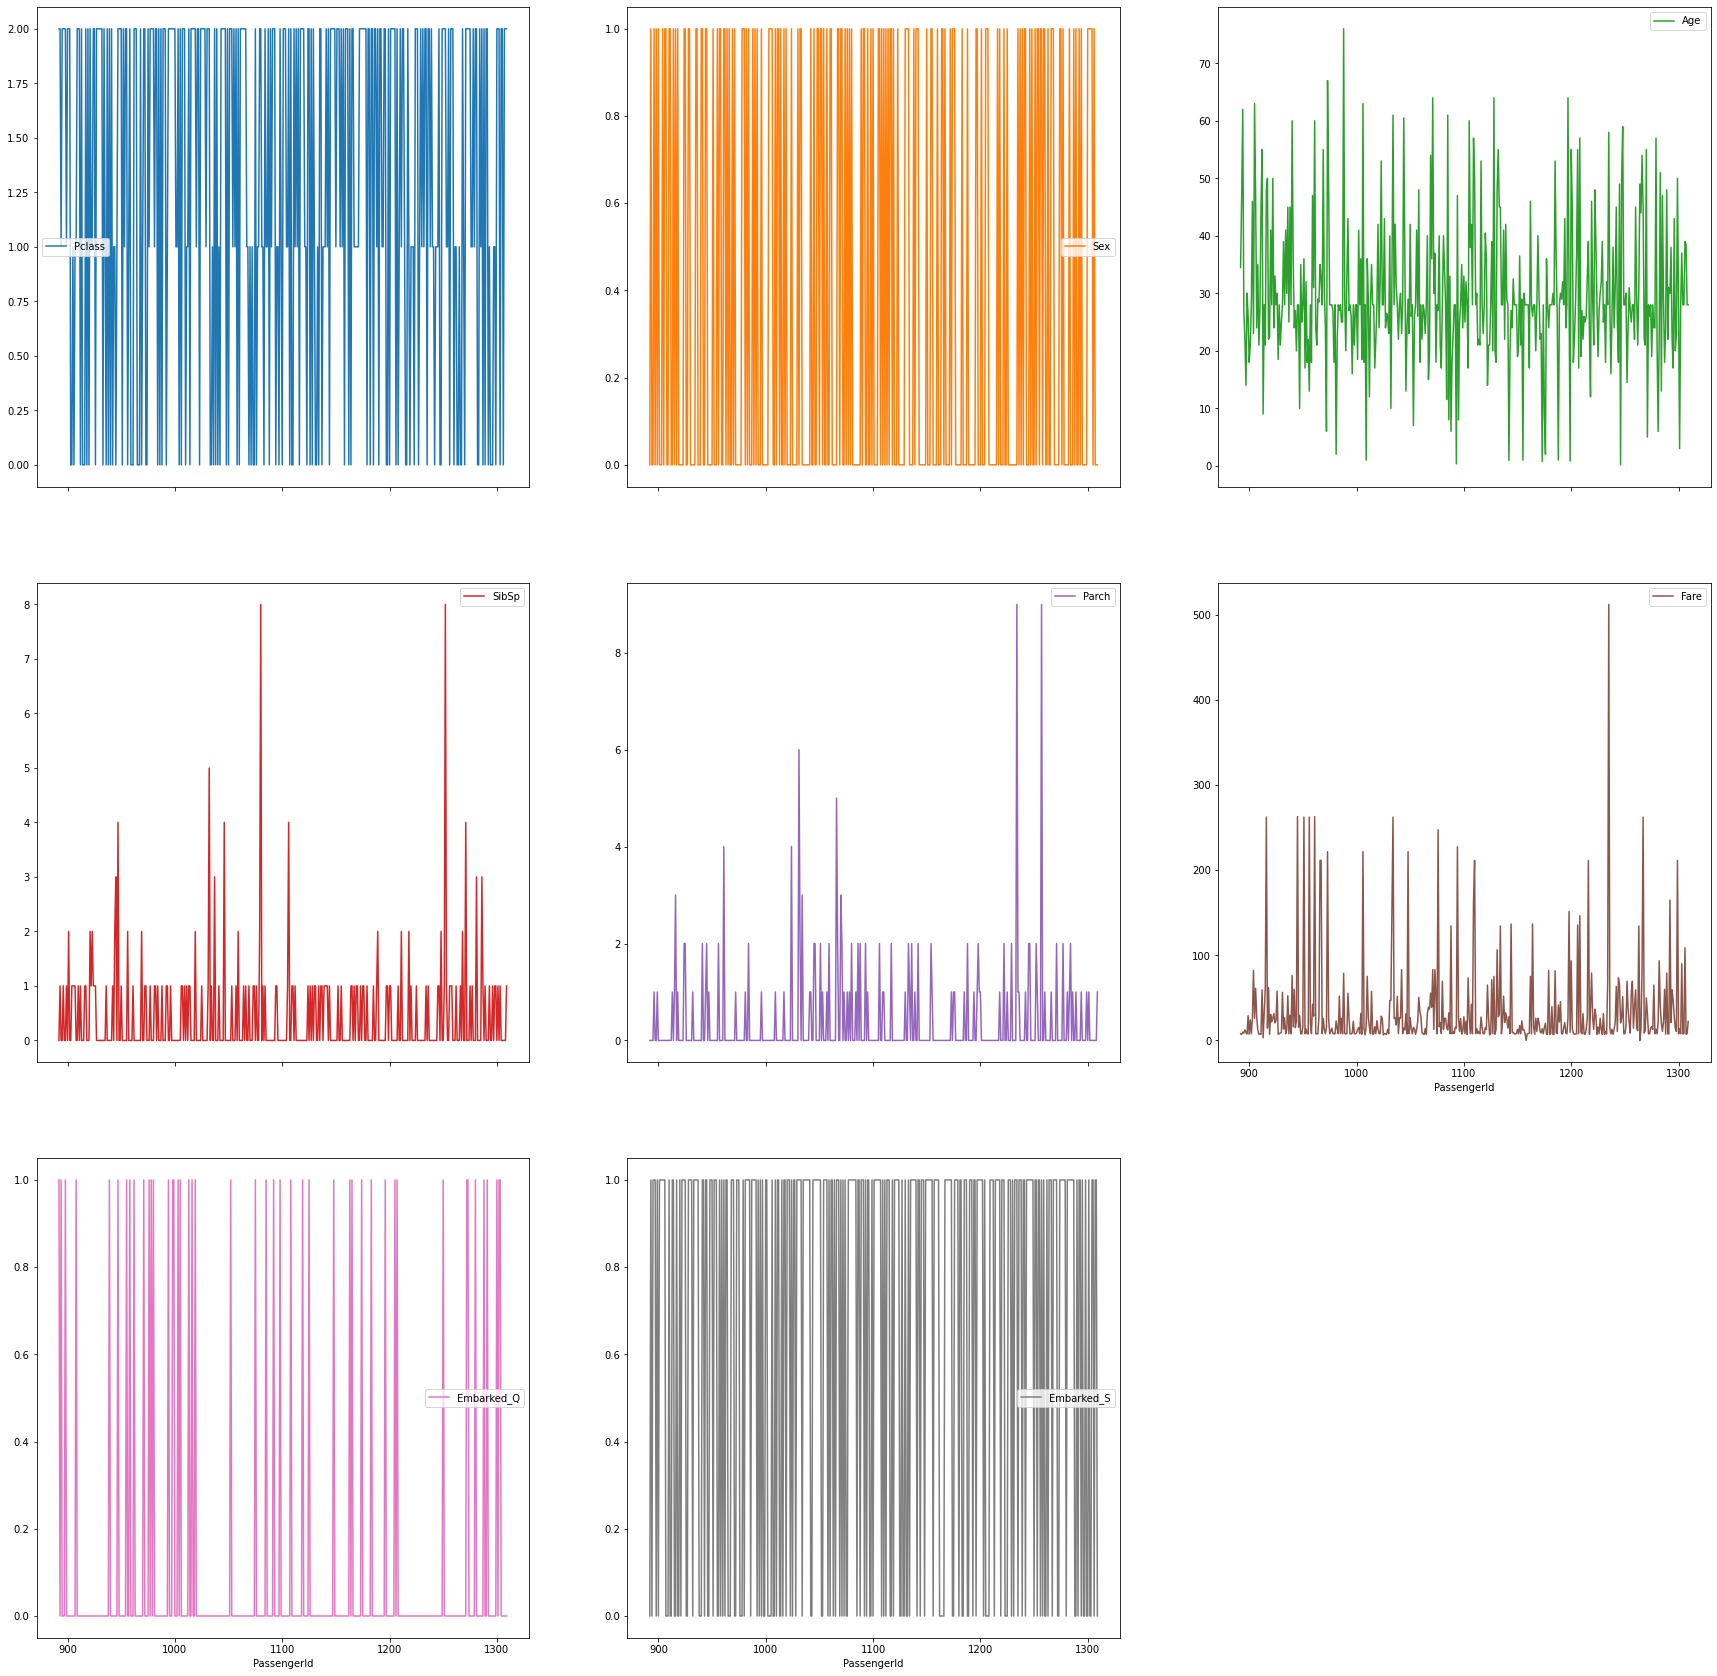

In [ ]:
#plots
transformed_competition_data.plot(subplots=True, layout=(3,3), use_index=True, figsize=(30, 30), fontsize=10, sort_columns=True)

#Decision Tree

Training the model

[Text(0.5, 0.875, 'X[1] <= 0.5\ngini = 0.472\nsamples = 801\nvalue = [495, 306]'),
 Text(0.25, 0.625, 'X[2] <= 6.5\ngini = 0.311\nsamples = 524\nvalue = [423, 101]'),
 Text(0.125, 0.375, 'X[3] <= 2.5\ngini = 0.423\nsamples = 23\nvalue = [7, 16]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[5] <= 26.269\ngini = 0.282\nsamples = 501\nvalue = [416, 85]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[0] <= 1.5\ngini = 0.385\nsamples = 277\nvalue = [72, 205]'),
 Text(0.625, 0.375, 'X[2] <= 2.5\ngini = 0.078\nsamples = 148\nvalue = [6, 142]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[5] <= 23.35\ngini = 0.5\nsamples = 129\nvalue = [66, 63]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

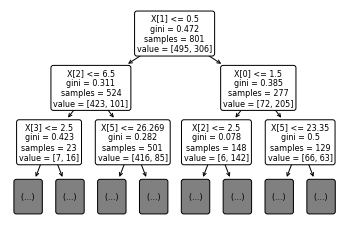

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
tree.plot_tree(clf, max_depth=2, fontsize=8, rounded=True)

Testing the model

In [ ]:
y_predict = clf.predict(x_test)

from sklearn import metrics
print("Decision Tree Accuracy = ", metrics.accuracy_score(y_true = y_test, y_pred = y_predict))

Decision Tree Accuracy =  0.8111111111111111


Training the model on the entire data

[Text(0.5, 0.875, 'X[1] <= 0.5\ngini = 0.472\nsamples = 801\nvalue = [495, 306]'),
 Text(0.25, 0.625, 'X[2] <= 6.5\ngini = 0.311\nsamples = 524\nvalue = [423, 101]'),
 Text(0.125, 0.375, 'X[3] <= 2.5\ngini = 0.423\nsamples = 23\nvalue = [7, 16]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[5] <= 26.269\ngini = 0.282\nsamples = 501\nvalue = [416, 85]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[0] <= 1.5\ngini = 0.385\nsamples = 277\nvalue = [72, 205]'),
 Text(0.625, 0.375, 'X[2] <= 2.5\ngini = 0.078\nsamples = 148\nvalue = [6, 142]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[5] <= 23.35\ngini = 0.5\nsamples = 129\nvalue = [66, 63]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

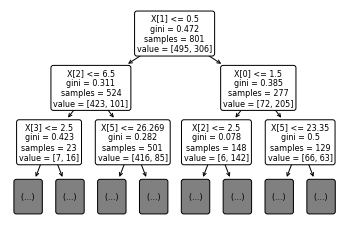

In [ ]:

clf_competition = tree.DecisionTreeClassifier()
clf_competition = clf_competition.fit(x, y)
tree.plot_tree(clf, max_depth=2, fontsize=8, rounded=True)

Run model on Competition Data

In [ ]:
y_predict_competition = clf.predict(transformed_competition_data)

In [ ]:
#Save into new dataframe
competition_output = transformed_competition_data.copy(deep=True)
competition_output['Survived'] = y_predict_competition

cols = competition_output.columns

competition_output = competition_output.drop(cols.drop('Survived'), axis=1)

print(competition_output)

             Survived
PassengerId          
892                 0
893                 1
894                 1
895                 1
896                 0
...               ...
1305                0
1306                1
1307                0
1308                0
1309                1

[418 rows x 1 columns]


In [ ]:
with open('/gdrive/My Drive/Kaggle/Titanic/output_decision_tree.csv', 'w') as f:
  competition_output.to_csv(f)

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

#train
rf_clf.fit(x_train, y_train)

#test
y_predict_rf = rf_clf.predict(x_test)

#accuracy
from sklearn import metrics
print("Decision Tree Accuracy = ", metrics.accuracy_score(y_true = y_test, y_pred = y_predict_rf))

Decision Tree Accuracy =  0.8333333333333334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Train and run model on competition data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

#train
rf_clf.fit(x, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier()

In [ ]:
y_predict_competition_rf = rf_clf.predict(transformed_competition_data)

#Save into new dataframe
competition_output_rf = transformed_competition_data.copy(deep=True)
competition_output_rf['Survived'] = y_predict_competition_rf

cols = competition_output_rf.columns

competition_output_rf = competition_output_rf.drop(cols.drop('Survived'), axis=1)

print(competition_output_rf)

             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 1
896                 0
...               ...
1305                0
1306                1
1307                0
1308                0
1309                1

[418 rows x 1 columns]


Write to file in drive

In [ ]:
with open('/gdrive/My Drive/Kaggle/Titanic/output_random_forest.csv', 'w') as f:
  competition_output_rf.to_csv(f)

#SVM

Grid search to find the value of the hyperparameter C

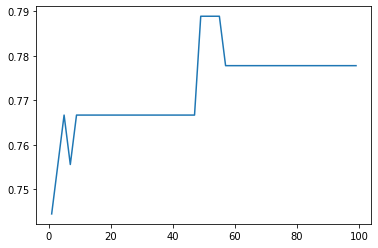

In [ ]:
from sklearn import svm

accuracies=[]
c_values=[]

for c in range(1, 101, 2):
  clf_svm = svm.SVC(gamma="auto", C=c)

  #train
  clf_svm.fit(x_train, y_train.values.ravel())

  #test
  pred = clf_svm.predict(x_test)

  #accuracy
  accuracy = metrics.accuracy_score(y_true = y_test, y_pred = pred)

  c_values.append(c)
  accuracies.append(accuracy)

from matplotlib import pyplot as plt

plt.plot(c_values, accuracies)

Choosing c=40

In [ ]:
clf_svm = svm.SVC(gamma="auto", C=40)

#train
clf_svm.fit(x_train, y_train)

#test
y_predict_svm = clf_svm.predict(x_test)

#accuracy
print("SVM Accuracy = ", metrics.accuracy_score(y_true = y_test, y_pred = y_predict_svm))

SVM Accuracy =  0.7666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train and run on competition data

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(gamma="auto", C=40)

#train
clf_svm.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=40, gamma='auto')

In [ ]:
y_predict_competition_svm = clf_svm.predict(transformed_competition_data)

#Save into new dataframe
competition_output_svm = transformed_competition_data.copy(deep=True)
competition_output_svm['Survived'] = y_predict_competition_svm

cols = competition_output_svm.columns

competition_output_svm = competition_output_svm.drop(cols.drop('Survived'), axis=1)

print(competition_output_svm)

             Survived
PassengerId          
892                 0
893                 0
894                 1
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


WRite to gdrive

In [ ]:
with open('/gdrive/My Drive/Kaggle/Titanic/output_svm.csv', 'w') as f:
  competition_output_svm.to_csv(f)

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()

#train
clf_nb.fit(x_train, y_train.values.ravel())

#test
y_predict_nb = clf_nb.predict(x_test)

#accuracy
print("Gaussian Naive Bayes Accuracy = ", metrics.accuracy_score(y_true = y_test, y_pred = y_predict_nb))

Gaussian Naive Bayes Accuracy =  0.8


Train and run on competition data

In [ ]:
clf_nb = GaussianNB()

#train
clf_nb.fit(x, y.values.ravel())

GaussianNB()

In [ ]:
y_predict_competition_nb = clf_nb.predict(transformed_competition_data)

#Save into new dataframe
competition_output_nb = transformed_competition_data.copy(deep=True)
competition_output_nb['Survived'] = y_predict_competition_nb

cols = competition_output_nb.columns

competition_output_nb = competition_output_nb.drop(cols.drop('Survived'), axis=1)

print(competition_output_nb)

             Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


Write to gdrive

In [ ]:
with open('/gdrive/My Drive/Kaggle/Titanic/output_nb.csv', 'w') as f:
  competition_output_nb.to_csv(f)

#KNN

Grid search for number of neighbors

23 0.8111111111111111


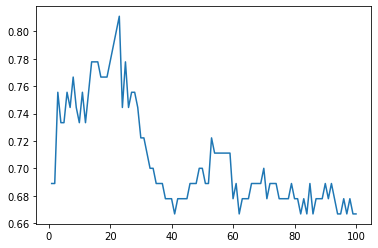

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

accuracies=[]
n_values=[]

highest_n = 0
highest_accuracy = 0

for n in range(1, 101):
  clf_knn = KNeighborsClassifier(n_neighbors=n)

  #train
  clf_knn.fit(x_train, y_train.values.ravel())

  #test
  pred = clf_knn.predict(x_test)

  #accuracy
  accuracy = metrics.accuracy_score(y_true = y_test, y_pred = pred)

  n_values.append(n)
  accuracies.append(accuracy)

  if(accuracy>highest_accuracy):
    highest_n = n
    highest_accuracy = accuracy

print(highest_n, highest_accuracy)

from matplotlib import pyplot as plt

plt.plot(n_values, accuracies)

Choosing n=17

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=17)

#train
clf_knn.fit(x_train, y_train.values.ravel())

#test
y_predict_knn = clf_knn.predict(x_test)

#accuracy
print("KNN Accuracy = ", metrics.accuracy_score(y_true = y_test, y_pred = y_predict_knn))

KNN Accuracy =  0.7666666666666667


Training on Competition Data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=17)

#train
clf_knn.fit(x, y.values.ravel())

KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_predict_competition_knn = clf_knn.predict(transformed_competition_data)

#Save into new dataframe
competition_output_knn = transformed_competition_data.copy(deep=True)
competition_output_knn['Survived'] = y_predict_competition_knn

cols = competition_output_knn.columns

competition_output_knn = competition_output_knn.drop(cols.drop('Survived'), axis=1)

print(competition_output_knn)

             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 0
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


In [ ]:
with open('/gdrive/My Drive/Kaggle/Titanic/output_knn.csv', 'w') as f:
  competition_output_knn.to_csv(f)

#**AdaBoost**

Grid search for Number of estimators

150 0.8444444444444444


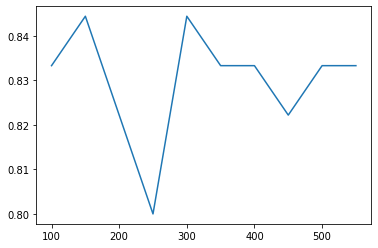

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

accuracies=[]
n_values=[]

highest_n = 0
highest_accuracy = 0

for n in range(100, 600, 50):
  clf_ada = AdaBoostClassifier(n_estimators=n, learning_rate=1.7)

  #train
  clf_ada.fit(x_train, y_train.values.ravel())

  #test
  pred = clf_ada.predict(x_test)

  #accuracy
  accuracy = metrics.accuracy_score(y_true = y_test, y_pred = pred)

  n_values.append(n)
  accuracies.append(accuracy)

  if(accuracy>highest_accuracy):
    highest_n = n
    highest_accuracy = accuracy

print(highest_n, highest_accuracy)

from matplotlib import pyplot as plt

plt.plot(n_values, accuracies)

Grid search for learning rate

1.7000000000000002 0.8444444444444444


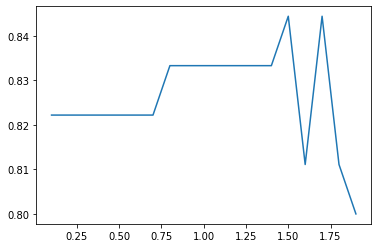

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

accuracies=[]
n_values=[]

highest_n = 0
highest_accuracy = 0

for n in np.arange(0.1, 2, 0.1):
  clf_ada = AdaBoostClassifier(n_estimators=150, learning_rate=n)

  #train
  clf_ada.fit(x_train, y_train.values.ravel())

  #test
  pred = clf_ada.predict(x_test)

  #accuracy
  accuracy = metrics.accuracy_score(y_true = y_test, y_pred = pred)

  n_values.append(n)
  accuracies.append(accuracy)

  if(accuracy>=highest_accuracy):
    highest_n = n
    highest_accuracy = accuracy

print(highest_n, highest_accuracy)

from matplotlib import pyplot as plt

plt.plot(n_values, accuracies)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(n_estimators=150, learning_rate=1.7)

#train
clf_ada.fit(x_train, y_train.values.ravel())

#test
y_predict_ada = clf_ada.predict(x_test)

#accuracy
print("AdaBoost Accuracy = ", metrics.accuracy_score(y_true = y_test, y_pred = y_predict_ada))

AdaBoost Accuracy =  0.8444444444444444


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(n_estimators=150, learning_rate=1.7)

#train
clf_ada.fit(x, y.values.ravel())

AdaBoostClassifier(learning_rate=1.7, n_estimators=150)

In [ ]:
y_predict_competition_ada = clf_ada.predict(transformed_competition_data)

#Save into new dataframe
competition_output_ada = transformed_competition_data.copy(deep=True)
competition_output_ada['Survived'] = y_predict_competition_ada

cols = competition_output_ada.columns

competition_output_ada = competition_output_ada.drop(cols.drop('Survived'), axis=1)

print(competition_output_ada)

             Survived
PassengerId          
892                 0
893                 0
894                 1
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


In [ ]:
with open('/gdrive/My Drive/Kaggle/Titanic/output_ada.csv', 'w') as f:
  competition_output_ada.to_csv(f)

# Gradient Boost

Grid search for the best learning rate

0.4 0.8777777777777778


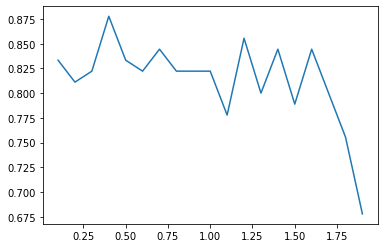

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

accuracies=[]
n_values=[]

highest_n = 0
highest_accuracy = 0

for n in np.arange(0.1, 2, 0.1):
  clf_gradient = GradientBoostingClassifier(learning_rate=n, n_estimators=150)

  #train
  clf_gradient.fit(x_train, y_train.values.ravel())

  #test
  pred = clf_gradient.predict(x_test)

  #accuracy
  accuracy = metrics.accuracy_score(y_true = y_test, y_pred = pred)

  n_values.append(n)
  accuracies.append(accuracy)

  if(accuracy>highest_accuracy):
    highest_n = n
    highest_accuracy = accuracy

print(highest_n, highest_accuracy)

from matplotlib import pyplot as plt

plt.plot(n_values, accuracies)

Grid search for the best number of estimators

150 0.8777777777777778


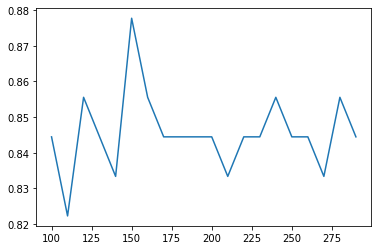

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

accuracies=[]
n_values=[]

highest_n = 0
highest_accuracy = 0

for n in np.arange(100, 300, 10):
  clf_gradient = GradientBoostingClassifier(learning_rate=0.4, n_estimators = n)

  #train
  clf_gradient.fit(x_train, y_train.values.ravel())

  #test
  pred = clf_gradient.predict(x_test)

  #accuracy
  accuracy = metrics.accuracy_score(y_true = y_test, y_pred = pred)

  n_values.append(n)
  accuracies.append(accuracy)

  if(accuracy>highest_accuracy):
    highest_n = n
    highest_accuracy = accuracy

print(highest_n, highest_accuracy)

from matplotlib import pyplot as plt

plt.plot(n_values, accuracies)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gradient = GradientBoostingClassifier(learning_rate=0.4, n_estimators=151)

#train
clf_gradient.fit(x_train, y_train.values.ravel())

#test
y_predict_gradient = clf_gradient.predict(x_test)

#accuracy
print("Gradient Boost Accuracy = ", metrics.accuracy_score(y_true = y_test, y_pred = y_predict_gradient))

Gradient Boost Accuracy =  0.8777777777777778


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gradient = GradientBoostingClassifier(learning_rate=0.4, n_estimators=151)

#train
clf_gradient.fit(x, y.values.ravel())

GradientBoostingClassifier(learning_rate=0.4, n_estimators=151)

In [ ]:
y_predict_competition_gradient = clf_gradient.predict(transformed_competition_data)

#Save into new dataframe
competition_output_gradient = transformed_competition_data.copy(deep=True)
competition_output_gradient['Survived'] = y_predict_competition_gradient

cols = competition_output_gradient.columns

competition_output_gradient = competition_output_gradient.drop(cols.drop('Survived'), axis=1)

print(competition_output_gradient)

             Survived
PassengerId          
892                 0
893                 0
894                 1
895                 1
896                 0
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


In [ ]:
with open('/gdrive/My Drive/Kaggle/Titanic/output_gradient.csv', 'w') as f:
  competition_output_gradient.to_csv(f)

# ANN

Checking whether GPU is being used.

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Creating the model, compiling and training it.

In [ ]:
model_ann = tf.keras.models.Sequential()
model_ann.add(tf.keras.Input(shape=(8,)))
model_ann.add(tf.keras.layers.Dense(4, activation='relu'))
model_ann.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_ann.summary()

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model_ann.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

ann_history = model_ann.fit(x, y, epochs=500, validation_split=testSize, batch_size = 10)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 4)                 36        
                                                                 
 dense_58 (Dense)            (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


81/81 [==============================] - 2s 10ms/step - loss: 0.7232 - accuracy: 0.5556 - val_loss: 0.5780 - val_accuracy: 0.6444
Epoch 2/500
 1/81 [..............................] - ETA: 0s - loss: 0.9834 - accuracy: 0.3000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


81/81 [==============================] - 1s 7ms/step - loss: 0.6742 - accuracy: 0.5743 - val_loss: 0.5687 - val_accuracy: 0.7556
Epoch 3/500
81/81 [==============================] - 0s 6ms/step - loss: 0.6546 - accuracy: 0.6529 - val_loss: 0.5621 - val_accuracy: 0.7444
Epoch 4/500
81/81 [==============================] - 0s 4ms/step - loss: 0.6431 - accuracy: 0.6679 - val_loss: 0.5588 - val_accuracy: 0.7556
Epoch 5/500
81/81 [==============================] - 0s 3ms/step - loss: 0.6318 - accuracy: 0.6729 - val_loss: 0.5572 - val_accuracy: 0.7667
Epoch 6/500
81/81 [==============================] - 0s 3ms/step - loss: 0.6270 - accuracy: 0.6704 - val_loss: 0.5495 - val_accuracy: 0.7667
Epoch 7/500
81/81 [==============================] - 0s 3ms/step - loss: 0.6188 - accuracy: 0.6717 - val_loss: 0.5488 - val_accuracy: 0.7778
Epoch 8/500
81/81 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.6742 - val_loss: 0.5554 - val_accuracy: 0.7667
Epoch 9/500
81/81 [======

Plotting the train and test accuracies

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


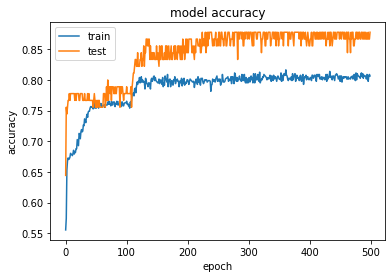

In [ ]:
import matplotlib.pyplot as plt

plt.plot(ann_history.history['accuracy'])
plt.plot(ann_history.history['val_accuracy'])
print(ann_history.history.keys())
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_ann.evaluate(x_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.3824 - accuracy: 0.8444


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[0.3823559582233429, 0.8444444537162781]

In [ ]:
y_predict_competition_ann = model_ann.predict(transformed_competition_data)
y_predict_competition_ann = np.where(y_predict_competition_ann<0.5, 0, 1)
#Save into new dataframe
competition_output_ann = transformed_competition_data.copy(deep=True)
competition_output_ann['Survived'] = y_predict_competition_ann

cols = competition_output_ann.columns

competition_output_ann = competition_output_ann.drop(cols.drop('Survived'), axis=1)
print(competition_output_ann)

             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


In [ ]:
with open('/gdrive/My Drive/Kaggle/Titanic/output_ann.csv', 'w') as f:
  competition_output_ann.to_csv(f)

# TPU

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

print("REPLICAS: ", strategy.num_replicas_in_sync)